# Perceptron Learning Algorithm

The _Perceptron Learning Algorithm_, also called PLA or just __perceptron__ is the simplest and yet very powerful learning algorithm based on one neuron. In the first part we will discuss the theory behind this algorithm and then we will jump to the [implementation part](#implementation).

### Theoretical aspects

The idea behind this algorithm relies on two important concepts: the _input_ and its _weight_. Every input has its weight based on how important it is in the model (to properly understand the dataset, read the [dataset-guide.ipynb](https://github.com/imAlessas/machine-learning/blob/main/algorithms/dataset-guide.ipynb) file). Given $N$ inputs, it is possible to create a hypothesis function $h(X_i)$ that will try to approximate the oracle $y_i$. The PLA output is binary: the perceptron is able to classify if one result is higher or lower than a threshold $T$. In other words, it classifies an input as one class or the other based on the threshold:
$$
    h(X_i) = w_1X_i^1 + w_2X_i^2 + \dots + w_dX_i^d \hspace{5px} = \hspace{5px} \sum_{j = 1}^d w_jX_i^j \leq T
$$
If we move the threshold $T$ on the other side of the inequality we can write:
$$
    h(X_i) = \sum_{j = 1}^d w_iX_i^j - T\leq 0 \hspace{5px} \rightarrow \hspace{5px} h(X_i) = \text{sign}\left[ \sum_{j = 1}^d w_jX_i^j - T \right] 
$$
Finally we can englobe the threshold $T$ into an initial input $x_0$ that we will call __bias__, and summarize the hypothesis as follows:
$$
    h(X_i) = \text{sign}\left[ \sum_{j = 0}^d w_jX_i^j\right] 
$$

This formula can be transformed in the following matrix close form:
$$
    h(X_i) = \text{sign}\left[ w^TX_i \right] = \text{sign}\left[ X_iw \right]
$$

### Learning rule

Let's try to understand what is happening. As we know, $w$ and $X_i$ are some $d$-dimensional vectors in a $d$-dimensional space. To simplify the things let us have $d = 2$, meaning that we will have two bi-dimensional vectors.

Let's hypotize the output $h(X_i) = \text{sign}\left[ w^TX_i \right] = -1$ and is not equal to $y_i = 1$. This means that The vectors $w$ and $X_i$ are discordant, like in this case:

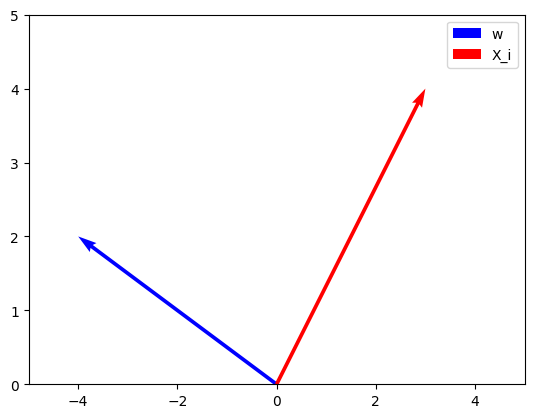

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the two vectors
w = np.array([-4, 2])
x_i = np.array([3, 4])

# plot the two vectors
_, ax = plt.subplots() # create a new figure

ax.quiver(0, 0, *w, angles='xy', scale_units='xy', scale=1, color='blue', label='w')    # first vector
ax.quiver(0, 0, *x_i, angles='xy', scale_units='xy', scale=1, color='red', label='X_i') # second vecotr

ax.set_xlim(-5, 5)
ax.set_ylim(0, 5)
ax.legend()

plt.show()

What can we do? The only thing we can do is to rotate the $w$ in such a way that it has the same sign of $X_i$. 

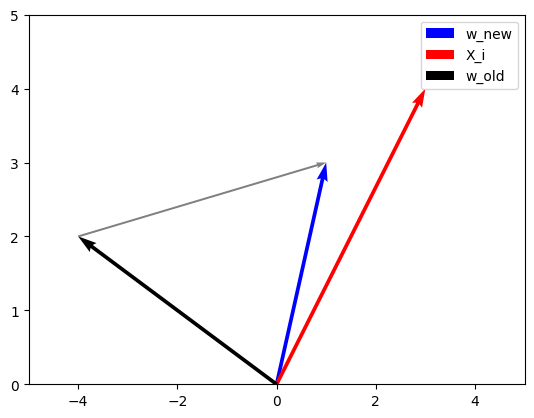

In [2]:
w_rotate = np.array([5, 1])
w_new = np.array([w[0] + w_rotate[0], w[1] + w_rotate[1]])

# plot the vectors
_, ax = plt.subplots() # create a new figure

ax.quiver(0, 0, *w_new, angles='xy', scale_units='xy', scale=1, color='blue', label='w_new') 
ax.quiver(0, 0, *x_i, angles='xy', scale_units='xy', scale=1, color='red', label='X_i') 
ax.quiver(0, 0, *w, angles='xy', scale_units='xy', scale=1, color='black', label='w_old')    
ax.quiver(w[0], w[1], *w_rotate, angles='xy', scale_units='xy', scale=1, color='gray', width = 4e-3) 

ax.set_xlim(-5, 5)
ax.set_ylim(0, 5)
ax.legend()

plt.show()

But how to know in which direction exactly rotate the vector $w$? If we need to update the vector, we know that its orientation is different compared with the $X_i$ vector. To know it we have to add or subtract the value of $X_i$, we use the information store in $y_i$: in the previous example we indeed added the rotation to the old vector, because $y_i = 1$

 In such a way the __update rule__ for the PLA will be:
 $$
    \boxed{ w_{\text{NEW}} = w_{\text{OLD}} + \eta(X_iy_i) }
 $$

We introduced the __learning rate__ $\eta$, which is used to stabilize the algorithm, generally, its value is between $10^{-3}$ and  $10^{-5}$

### Pseudocode 

We have all the information needed to define the PLA pseudocode:
1. $ \text{initiate weight}\,\, w\,\, \text{and},\,\, i \leftarrow 1 $
1. $ \forall\,X_i\,\,\,\,\text{predict}\,\,\,\,\text{sign} (w^TX_i) \text{} $
1. $\text{if}\,\,y_i(w^TX_i) < 0\,\,\,\, \text{then}\,\, w \leftarrow w + \eta(X_iy_i)$
1. $i \leftarrow i + 1$

# Implementation

## Initial setup

The first thing to do is to generate some __pseudo-random__ numbers. They are called that way because, given the _seed_ (which, in this case, is 314), their generation is entirely deterministic. In such a way the simulation is replicable. Then the number <tt>N</tt> of samples per class is defined (can be seen as the $N$ of the _Hoeffding's inequality_).

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# pseudo-random number generator
np.random.seed(314)

# generate 1000 points per class
N = 1000

After that, the <tt>normal</tt> function is used to generate the numbers in a Gaussian curve. The specified values stand for:
* <tt>loc</tt>, specifying the _mean_ of the curve;
* <tt>scale</tt>, which is the _standard deviation_;

These two values make the bell curve very dense across the value $0.5$. This technique is used to generate 4 sets: the first and second features for classes 1 and 2.


In [4]:
# generates firs and second feature of class 1
X1_1 = np.random.normal(loc = 6, scale = 1, size = N)

X1_2 = np.random.normal(loc = 2, scale = 1.5, size=N)

# labels of the points for class 1
y1 = np.ones(N)


# generates firs and second feature of class 2
X2_1 = np.random.normal(loc = 0, scale = 1, size = N)

X2_2 = np.random.normal(loc = 8, scale = 1.5, size = N)

# labels of the points for class 2
y2 = - np.ones(N)

After generating the sets containing the coordinates of the points, it is suggested to plot them using the scatter</tt> function.

Secondly, the _weight_ vector $w = {w_0, \dots, w_d}$ is generated through the <tt>uniform</tt> function that generates a random set of 3 numbers with a uniform distribution between $[-1, 1]$.

Eventually, the final setup is displayed using the <tt>plot</tt> function.

[1. 1. 1.]


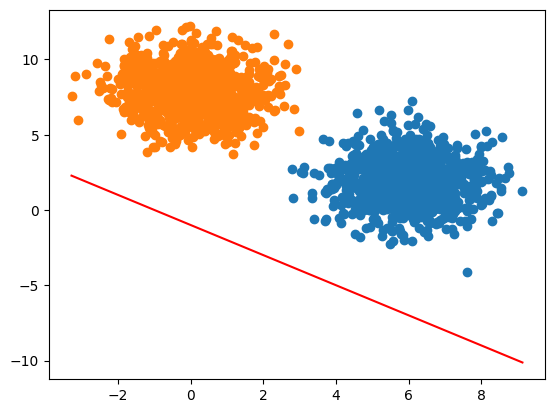

In [5]:
# plots the sets of points
plt.scatter(X1_1, X1_2)
plt.scatter(X2_1, X2_2)

# generates w = {w0, ..., wn}
w = np.random.uniform(low = 1, size = 3)
print(w)

# plots the initial setup
plt.plot([np.min(X2_1), np.max(X1_1)], # defines coordinates of the line
         [np.min(X2_1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1_1) * (-w[1]/w[2]) - w[0]/w[2]], # defines y = mx + q
         color='red')


To start the learning algorithm it is first necessary to create the actual vectors that are going to be used in the algorithm:

* $X_0$ is an array of all ones representing the _bias vector_;

* $X_1$ and $X_2$ contains the features of the dataset of the 1st and 2nd class

* $X$ is the matrix containing the three previous vectors: each row is a datapoint while every column is a _feature_;

* $Y$ contains the label for the _classification_ task.

2000


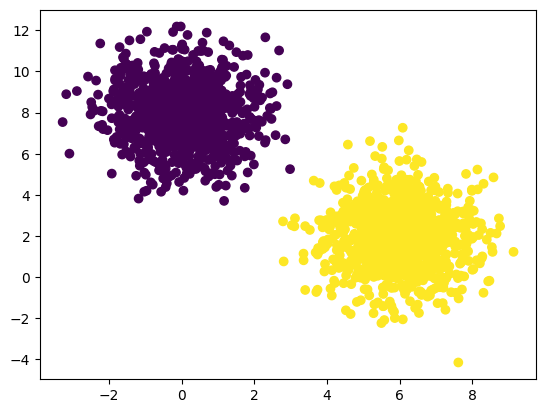

In [6]:
# bias vector
X0 = np.ones(N * 2)

# features of the dataset
X1 = np.concatenate((X1_1, X2_1))
X2 = np.concatenate((X1_2, X2_2))

# feature matrix
X = np.stack((X0, X1, X2), axis=1)

# labels
y = np.concatenate((y1, y2))

# plots the points
plt.scatter(X[:, 1], X[:, 2], c = y)

# number of datapoints
print(y.shape[0])

## Learning algorithm

Now that the vectors and matrices are set up we can start the algorithm by initializing the variables <tt>errors_epoch</tt> (vector in which, for each epoch, it will be stored the number of errors), <tt>current_epoch</tt>, <tt>max_epochs</tt> (maximum number of iterations) and <tt>eta</tt>, indicating the Greek letter $\eta \in ]0, 1]$, associated with the __learning rate__

In [7]:
# max number of iterations
max_epochs = 100
current_epoch = 0

# learning rate
eta = 1e-3

# error per epoch
errors_epoch = np.zeros(max_epochs)

When the loop starts the number of <tt>epochs</tt> is increased. After that, the algorithm loops through every entry inside $Y$ (in this case there are 20 entries). Inside the <tt>for</tt> loop the correction algorithm extracts the $i$-th point from the dataset and checks if the weight vector makes a good prediction (check between the sign of $y$ and $w\cdot x$). If the weight vector's prediction is wrong the following correction is made:

$$
w_{\text{new}} = w_{\text{old}} + \eta(x\,y)
$$

In [8]:
while current_epoch < max_epochs: # starts looping
    
    # loop through each datapoint 
    for i in range(y.size):
        
        # feature for index i
        X_i = X[i, :]
        
        # label for index i
        y_i = y[i]
        
        # if prediction and true value are different
        if ((np.dot(w, X_i) * y_i) < 0):

            # update rule
            w = w + eta * (X_i * y_i)

            # increase errors
            errors_epoch[current_epoch] += 1
    
    # increase epochs
    current_epoch += 1

After finishing the algorithm the only thing to do is display the values and plot the initial points with the solution found by the algorithm

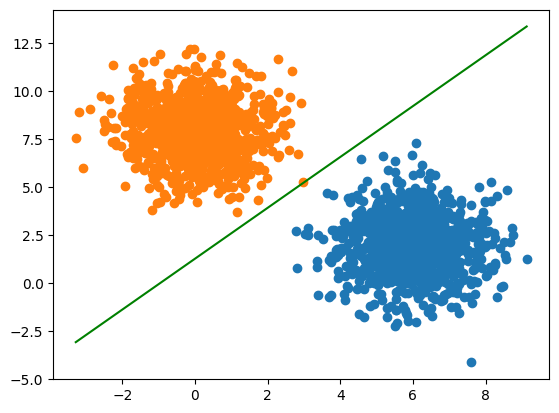

In [9]:
# plots the point
plt.scatter(X1_1, X1_2)
plt.scatter(X2_1, X2_2)

# plots the solution
plt.plot([np.min(X1), np.max(X1)],
         [np.min(X1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1) * (-w[1]/w[2]) - w[0]/w[2]],
         color = 'green')

We can also plot the number of errors and see how the curve decreases as the algorithm starts correcting the weight.

Misclassified data-points: 0
First 10 epochs errors:
   [189.   6.   5.   3.   2.   2.   2.   1.   1.   1.]


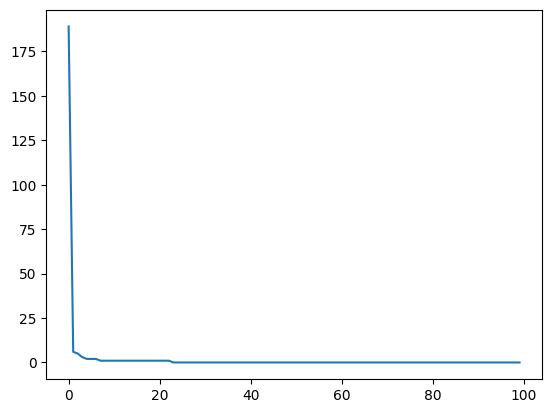

In [10]:
print(f"Misclassified data-points: {errors_epoch[-1]:.0f}")
print(f"First 10 epochs errors:\n   {errors_epoch[:10]}")

# plot graph
plt.plot(range(errors_epoch.size), errors_epoch)